In [1]:
# Scripts and results related to how the data was preprocessed.
# e.g., comparisons of laplace smoothing measures and network thresholds

In [2]:
#Basic imports
import sys

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

DATA_DIR = "/dfs/scratch0/googlengrams/2012-eng-fic/"
sys.path.append("../langchange")

import ioutils as util
from cooccurrence import matstore
from timeseries import plothelper, changepoint, trendestimator, seriesanalysis

%matplotlib inline

In [30]:
all_words = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-0-8.pkl")
top_words = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-0-7.pkl")
common_top_words = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-8-7.pkl")
common_top_top_words = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-8-6.pkl")
top_top_words = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-0-6.pkl")
#year_words = util.load_pickle(DATA_DIR + "/info/freqnonstop_peryear-1900-2000-6.pkl")
year_words_large = util.load_pickle(DATA_DIR + "/info/freqnonstop_peryear-1900-2000-7.pkl")
years = np.arange(1900, 2001)

In [4]:
test = matstore.retrieve_mat_as_coo(DATA_DIR + "/5grams_sym/1914.bin")

In [6]:
from cooccurrence.indexing import get_word_indices
index = util.load_pickle(DATA_DIR + "/5grams/merged_index.pkl")

In [7]:
words, word_indices = get_word_indices(year_words_large[1914][:30000], index)

In [12]:
coo_test = test.tocsr()
for word_index in word_indices:
    if coo_test[word_index, :].sum() <= 0:
        print 'WHHAT'

In [13]:
coo_test.shape

(165118, 165118)

In [66]:
common = set(year_words_large[1900])
for word_list in year_words_large.itervalues():
    common = common.intersection(set(word_list))

In [70]:
len(common)

18159

In [64]:
last_word_list = []
year_overlaps = []
for word_list in year_words_large.itervalues():
    year_overlaps.append(len(set(word_list).intersection(set(last_word_list))))
    last_word_list = word_list

In [68]:
np.mean(year_overlaps)

31693.247524752474

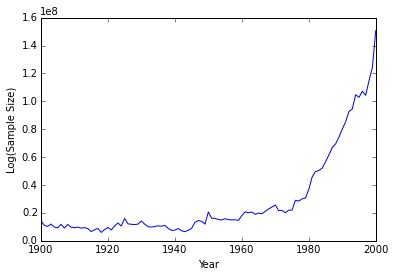

In [3]:
samplesizes = util.load_pickle(DATA_DIR + "info/samplesizes-top20000.pkl")
log_samplesizes = np.log(np.array(samplesizes.values()))
plt.plot(samplesizes.keys(), samplesizes.values())
plt.xlabel("Year")
plt.ylabel("Log(Sample Size)")

In [326]:
np.percentile(np.array(samplesizes.values()), 10)

8808396.0

In [108]:
samplesizes[1918] 

6023272.0

In [273]:
mat1900_r = matstore.retrieve_mat_as_coo(DATA_DIR + "/null_sym/1900.bin")
mat1950_r = matstore.retrieve_mat_as_coo(DATA_DIR + "/null_sym/1900.bin")
mat1990_r = matstore.retrieve_mat_as_coo(DATA_DIR + "/null_sym/1990.bin")

In [27]:
mat1900_r2 = matstore.retrieve_mat_as_coo(DATA_DIR + "/5grams_sym/1918.bin")
mat1950_r2 = matstore.retrieve_mat_as_coo(DATA_DIR + "/5grams/1950.bin")
mat1990_r2 = matstore.retrieve_mat_as_coo(DATA_DIR + "/5grams_sym/1990.bin")

In [25]:
mat1900_r.data

NameError: name 'mat1900_r' is not defined

In [13]:
len(mat1900_r2.nonzero()[1])

2452669

In [274]:
mat1900_r.sum()

138036924.0

In [281]:
mat1990_r.sum() / mat1900_r.sum()

5.9257591396342617

In [264]:
test = mat1900_r2.tocsr()

In [265]:
indices = np.array([1,20,30,40,50,60,100,200])

In [266]:
test= test[indices, :]
test = test[:, indices]

In [268]:
test != test.T

<8x8 sparse matrix of type '<type 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

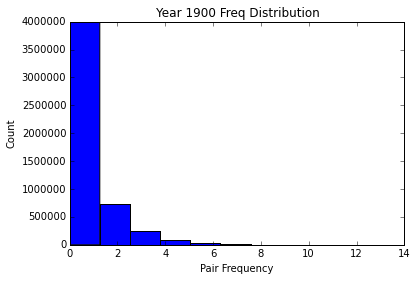

In [73]:
p = plt.hist(np.log(mat1900_r.data), bins=10)
lim = plt.ylim(0, 4 * 10 ** 6.0)
plt.xlabel("Pair Frequency")
plt.ylabel("Count")
plt.title("Year 1900 Freq Distribution")

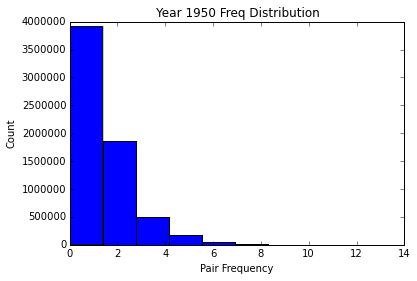

In [2431]:
p = plt.hist(np.log(mat1950_r2.data), bins=10)
lim = plt.ylim(0, 4 * 10 ** 6.0)
plt.xlabel("Pair Frequency")
plt.ylabel("Count")
plt.title("Year 1950 Freq Distribution")

In [2335]:
p

(array([  3.41481800e+06,   1.60072700e+06,   4.23323000e+05,
          1.49845000e+05,   5.15160000e+04,   1.61490000e+04,
          4.52900000e+03,   1.00400000e+03,   1.88000000e+02,
          2.40000000e+01]),
 array([  0.        ,   1.38365898,   2.76731796,   4.15097695,
          5.53463593,   6.91829491,   8.30195389,   9.68561287,
         11.06927186,  12.45293084,  13.83658982]),
 <a list of 10 Patch objects>)

In [2347]:
gg = (test/mat1990_r.sum()*mat1900_r.sum())

In [26]:
from cooccurrence.indexing import get_word_indices

In [35]:
_, word_indices = get_word_indices(year_words_large[1900][:20000], util.load_pickle(DATA_DIR + "/5grams/merged_index.pkl"))

In [71]:
mat = mat1900_r2.tocsr() 
mat = mat[word_indices, :]
mat = mat[:, word_indices]

In [72]:
test = np.random.multinomial(6*10**6.0, mat.data / mat.data.sum())

In [73]:
(test > 0).sum()

839558

In [2342]:
len(mat1900_r.data)

4791911

In [2354]:
test = mat1990_r.data[mat1990_r.data / mat1990_r.sum() > 0.0 / mat1900_r.sum()] 

In [2324]:
test2.min()

1.0

In [2317]:
test2 = mat1990_r.data[mat1990_r.data > 0] 

In [2326]:
(test/mat1990_r.sum()*mat1900_r.sum()).sum()

139234203.25042859

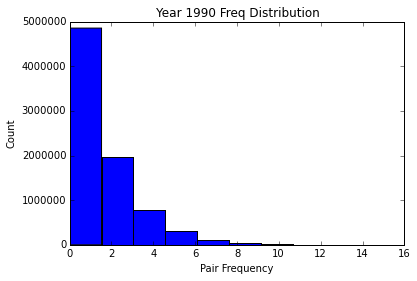

In [2432]:
#p = plt.hist(np.log(test/mat1990_r.sum()*mat1900_r.sum()), bins=10)
p = plt.hist(np.log(mat1990_r2.data), bins=10)
#lim = plt.ylim(0, 4 * 10 ** 6.0)
plt.xlabel("Pair Frequency")
plt.ylabel("Count")
plt.title("Year 1990 Freq Distribution")

In [2332]:
p

(array([  1.33124300e+06,   5.54768000e+05,   2.59194000e+05,
          1.09328000e+05,   4.12060000e+04,   1.39560000e+04,
          4.14300000e+03,   9.84000000e+02,   2.02000000e+02,
          2.30000000e+01]),
 array([  0.03662052,   1.38187243,   2.72712433,   4.07237624,
          5.41762814,   6.76288004,   8.10813195,   9.45338385,
         10.79863576,  12.14388766,  13.48913956]),
 <a list of 10 Patch objects>)

In [191]:
# pull three very different years
#mat1900 = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth9/1900.bin")
mat1950 = matstore.retrieve_mat_as_coo(DATA_DIR + "/conf_fwer/alpha0.1/1980.bin")
#mat1990 = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth9/1990.bin")

In [127]:
len(mat1900.nonzero()[1])

2225575

In [192]:
len(mat1950.nonzero()[1])

1502319

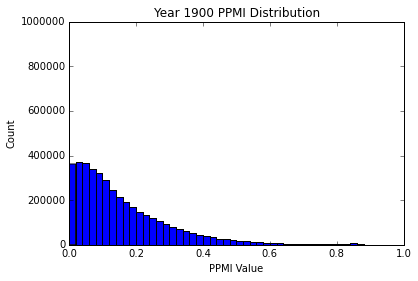

In [1389]:
p = plt.hist(mat1900.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1900 PPMI Distribution")

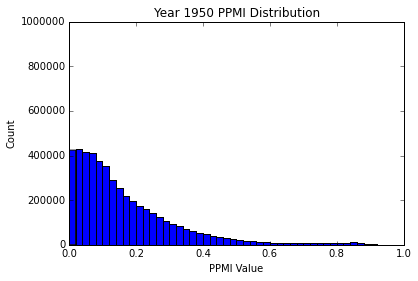

In [1390]:
p = plt.hist(mat1950.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1950 PPMI Distribution")

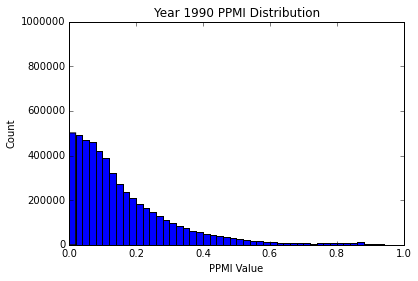

In [1391]:
p = plt.hist(mat1990.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1990 PPMI Distribution")

In [282]:
mat1900_s1 = matstore.retrieve_mat_as_coo(DATA_DIR + "/null_conf/alpha0.05/1960.bin")
mat1950_s1 = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth10/1950.bin")
mat1990_s1 = matstore.retrieve_mat_as_coo(DATA_DIR + "/null_conf/alpha0.05/1990.bin")

In [4]:
test = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_conf/lsmooth10/1970.bin")
test = test.tocsr()

In [7]:
test[8471, :].nonzero()

(array([0], dtype=int32), array([0], dtype=int32))

In [29]:
(mat1900_s1.data > 0.5).sum()

49018

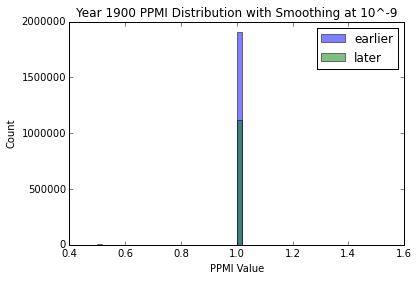

In [283]:
data_1900 = mat1900_s1.data[mat1900_s1.data > 0]
data_1990 = mat1990_s1.data[mat1990_s1.data > 0]
p = plt.hist(data_1900, bins=50, alpha=0.5)
p = plt.hist(data_1990, bins=50, alpha=0.5)
plt.legend(["earlier", "later"])
#lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1900 PPMI Distribution with Smoothing at 10^-9")

In [422]:
data_1900.mean()

0.081541815023246672

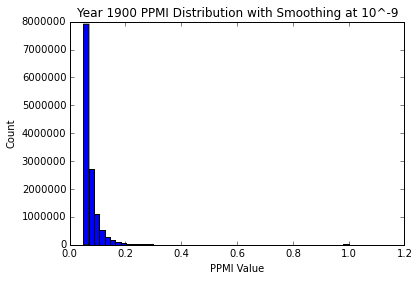

In [20]:
#data_1950 = mat1950_s1.data[mat1950_s1.data > 0]
p = plt.hist(mat1950_s1.data, bins=50)
#lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1900 PPMI Distribution with Smoothing at 10^-9")

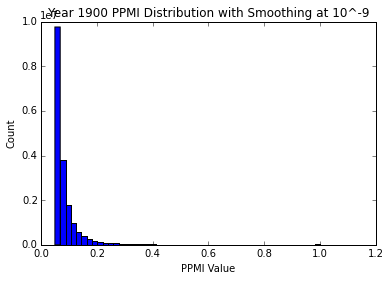

In [21]:
#data_1990 = mat1990_s1.data[mat1990_s1.data > 0]
p = plt.hist(mat1990_s1.data, bins=50)
#lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1900 PPMI Distribution with Smoothing at 10^-9")

In [2208]:
mat1900_s = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_fixed/lsmooth8/1900.bin")
mat1950_s = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_fixed/lsmooth8/1950.bin")
mat1990_s = matstore.retrieve_mat_as_coo(DATA_DIR + "/nppmi_fixed/lsmooth8/1990.bin")

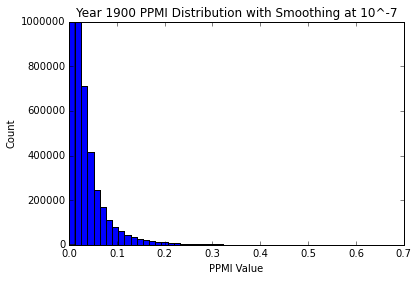

In [2209]:
p = plt.hist(mat1900_s.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1900 PPMI Distribution with Smoothing at 10^-7")

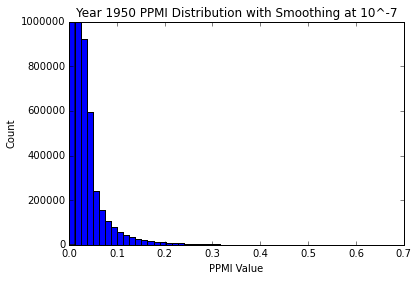

In [2210]:
p = plt.hist(mat1950_s.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1950 PPMI Distribution with Smoothing at 10^-7")

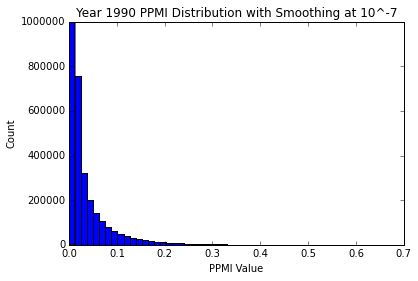

In [2211]:
p = plt.hist(mat1990_s.data, bins=50)
lim = plt.ylim(0, 10 ** 6.0)
plt.xlabel("PPMI Value")
plt.ylabel("Count")
plt.title("Year 1990 PPMI Distribution with Smoothing at 10^-7")

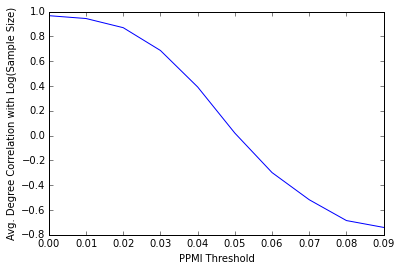

In [1645]:
corrs = []
threshs = np.arange(0.0, 0.1, 0.01)
for thresh in threshs:
    avg_degs = util.load_pickle(DATA_DIR + "/nppmi/lsmooth9/netstats/commonnonstop-1900-2000-8-6-{thresh}-avg_deg.pkl".format(thresh=thresh))
    corrs.append(sp.stats.pearsonr(avg_degs.values(), log_samplesizes)[0])
plt.plot(threshs, corrs)
plt.xlabel("PPMI Threshold")
plt.ylabel("Avg. Degree Correlation with Log(Sample Size)")

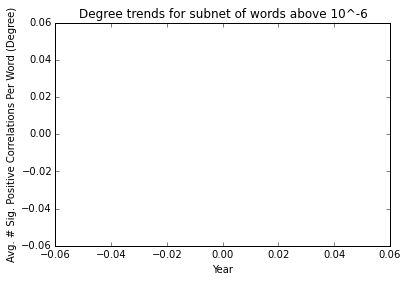

In [54]:
# Degrees from normalized confidences
conf_degs_top = util.load_pickle(DATA_DIR + "/nppmi_simple/lsmooth9/netstats/freqnonstop_peryear-1900-2000-7-top30000-deg.pkl")
avg_conf_degs_top = seriesanalysis.get_series_mean_stderr(conf_degs_top, conf_degs_top.keys())
plothelper.plot_nice_err(years, avg_conf_degs_top[0], avg_conf_degs_top[1])
plt.xlabel("Year")
plt.ylabel("Avg. # Sig. Positive Correlations Per Word (Degree)")
plt.title("Degree trends for subnet of words above 10^-6")

In [55]:
conf_degs_top

{u'fawn': {1900: nan,
  1901: nan,
  1902: nan,
  1903: nan,
  1904: nan,
  1905: nan,
  1906: nan,
  1907: nan,
  1908: nan,
  1909: nan,
  1910: nan,
  1911: nan,
  1912: nan,
  1913: nan,
  1914: nan,
  1915: nan,
  1916: nan,
  1917: nan,
  1918: nan,
  1919: nan,
  1920: nan,
  1921: nan,
  1922: nan,
  1923: nan,
  1924: nan,
  1925: nan,
  1926: nan,
  1927: nan,
  1928: nan,
  1929: nan,
  1930: nan,
  1931: nan,
  1932: nan,
  1933: nan,
  1934: nan,
  1935: nan,
  1936: nan,
  1937: nan,
  1938: nan,
  1939: nan,
  1940: nan,
  1941: nan,
  1942: nan,
  1943: nan,
  1944: nan,
  1945: nan,
  1946: nan,
  1947: nan,
  1948: nan,
  1949: nan,
  1950: nan,
  1951: nan,
  1952: nan,
  1953: nan,
  1954: nan,
  1955: nan,
  1956: nan,
  1957: nan,
  1958: nan,
  1959: nan,
  1960: nan,
  1961: nan,
  1962: nan,
  1963: nan,
  1964: nan,
  1965: nan,
  1966: nan,
  1967: nan,
  1968: nan,
  1969: nan,
  1970: nan,
  1971: nan,
  1972: nan,
  1973: nan,
  1974: nan,
  1975: nan,
  1

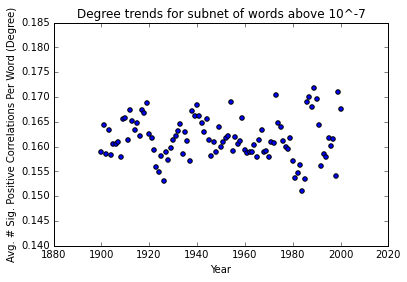

In [364]:
# Degrees from normalized confidences
conf_degs = util.load_pickle(DATA_DIR + "nppmi_simple/lsmooth9/netstats/freqnonstop_peryear-1900-2000-7-top20000-binary.pkl")
avg_conf_degs = seriesanalysis.get_series_mean_stderr(conf_degs, conf_degs.keys())
#plothelper.plot_nice_err(years, avg_conf_degs[0], avg_conf_degs[1])
plt.scatter(years, avg_conf_degs[0])
plt.xlabel("Year")
plt.ylabel("Avg. # Sig. Positive Correlations Per Word (Degree)")
plt.title("Degree trends for subnet of words above 10^-7")

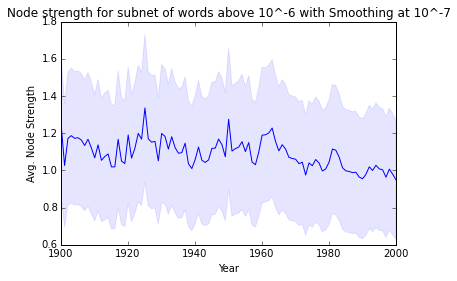

In [1818]:
# Sums from normalized confidences 
conf_sums_top = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth7/netstats/commonnonstop-1900-2000-0-6-0.0-sum.pkl")
avg_conf_sums_top = seriesanalysis.get_series_mean_conf(conf_sums_top, top_top_words)
plothelper.plot_nice_err(years, avg_conf_sums_top[0], avg_conf_sums_top[1])
plt.xlabel("Year")
plt.ylabel("Avg. Node Strength")
plt.title("Node strength for subnet of words above 10^-6 with Smoothing at 10^-7")

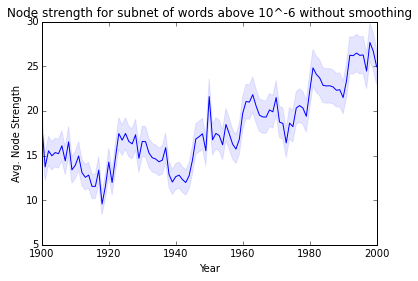

In [1823]:
# Sums from normalized confidences 
conf_sums_top = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth0/netstats/commonnonstop-1900-2000-0-6-0.0-sum.pkl")
avg_conf_sums_top = seriesanalysis.get_series_mean_conf(conf_sums_top, top_top_words)
plothelper.plot_nice_err(years, avg_conf_sums_top[0], avg_conf_sums_top[1])
plt.xlabel("Year")
plt.ylabel("Avg. Node Strength")
plt.title("Node strength for subnet of words above 10^-6 without smoothing")

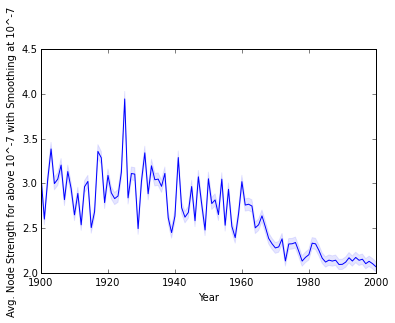

In [2214]:
# Sums from normalized confidences 
conf_sums = util.load_pickle(DATA_DIR + "/nppmi_corr/lsmooth8/netstats/commonnonstop-1900-2000-0-6-0.0-sum.pkl")
avg_conf_sums = seriesanalysis.get_series_mean_conf(conf_sums, conf_sums.keys())
plothelper.plot_nice_err(years, avg_conf_sums[0], avg_conf_sums[1])
plt.xlabel("Year")
plt.ylabel("Avg. Node Strength for above 10^-7 with Smoothing at 10^-7")

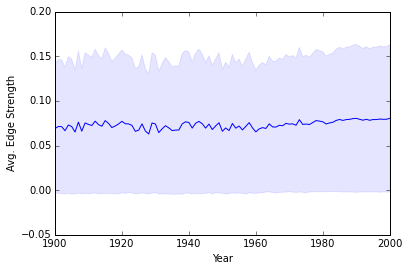

In [2218]:
plothelper.plot_nice_err(years, avg_conf_sums[0]/avg_conf_degs[0], avg_conf_sums[1]/avg_conf_degs[1])
plt.xlabel("Year")
plt.ylabel("Avg. Edge Strength")

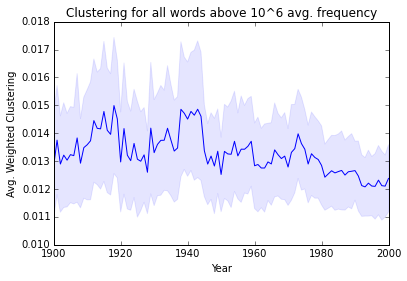

In [1822]:
# Sums from normalized confidences 
conf_wclust_top = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth0/netstats/commonnonstop-1900-2000-0-6-0.0-weighted.pkl")
avg_conf_wclusts = seriesanalysis.get_series_mean_conf(conf_wclust_top, all_words)
plothelper.plot_nice_err(years, avg_conf_wclusts[0], avg_conf_wclusts[1])
plt.xlabel("Year")
plt.ylabel("Avg. Weighted Clustering")
plt.title("Clustering for all words above 10^6 avg. frequency")

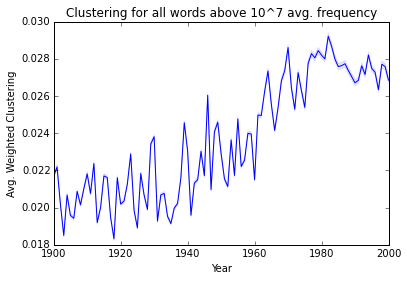

In [2221]:
# Sums from normalized confidences 
conf_wclust = util.load_pickle(DATA_DIR + "/nppmi_corr/lsmooth8/netstats/commonnonstop-1900-2000-0-6-0.0-weighted.pkl")
avg_conf_wclusts = seriesanalysis.get_series_mean_conf(conf_wclust, top_words)
plothelper.plot_nice_err(years, avg_conf_wclusts[0], avg_conf_wclusts[1])
plt.xlabel("Year")
plt.ylabel("Avg. Weighted Clustering")
plt.title("Clustering for all words above 10^7 avg. frequency")

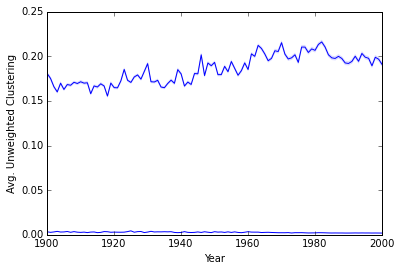

In [2222]:
# Degrees from normalized confidences
conf_bclust = util.load_pickle(DATA_DIR + "/nppmi_corr/lsmooth8/netstats/commonnonstop-1900-2000-0-6-0.0-binary.pkl")
avg_conf_bclust_mean, avg_conf_bclust_stderr, rand_clust = seriesanalysis.get_series_mean_conf_clust(conf_bclust, avg_conf_degs[0])
plothelper.plot_nice_err(years, avg_conf_bclust_mean, avg_conf_bclust_stderr)
plt.plot(years, rand_clust)
plt.xlabel("Year")
plt.ylabel("Avg. Unweighted Clustering")

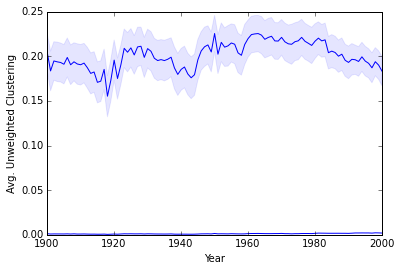

In [1826]:
# Degrees from normalized confidences
conf_bclust_top = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth7/netstats/commonnonstop-1900-2000-0-6-0.0-binary.pkl")
avg_conf_bclust_top_mean, avg_conf_bclust_top_stderr, rand_clust = seriesanalysis.get_series_mean_conf_clust(conf_bclust, avg_conf_degs[0])
plothelper.plot_nice_err(years, avg_conf_bclust_top_mean, avg_conf_bclust_top_stderr)
plt.plot(years, rand_clust)
plt.xlabel("Year")
plt.ylabel("Avg. Unweighted Clustering")

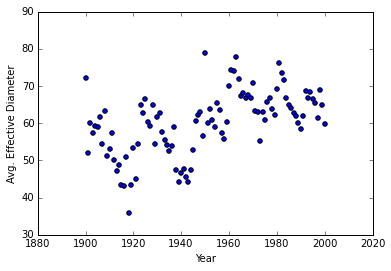

In [325]:
# Degrees from normalized confidences
avg_clust = util.load_pickle(DATA_DIR + "/conf/alpha0.01/netstats/net-avg_deg.pkl")
#avg_deg = util.load_pickle(DATA_DIR + "/conf_corr/alpha0.01/netstats/commonnonstop_pearyear-1900-2000-0-6-avg_deg.pkl")
rw_avg_clust = util.load_pickle(DATA_DIR + "/conf/alpha0.01/netstats/net-rw-avg_clust.pkl")
plt.scatter(years, avg_clust.values())
#plothelper.plot_smooth(years, rw_avg_clust.values(), color='green')
plt.xlabel("Year")
plt.ylabel("Avg. Effective Diameter")

In [ ]:
avg_clust = util.load_pickle(DATA_DIR + "/conf_fwer/alpha0.1/netstats/net-ma.pkl")

In [309]:
import statsmodels.api as sm
x = sm.add_constant(years)
mod = sm.OLS(np.array(avg_clust.values()), x)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.67
Date:                Mon, 29 Jun 2015   Prob (F-statistic):           1.20e-08
Time:                        21:57:21   Log-Likelihood:                -343.38
No. Observations:                 101   AIC:                             690.8
Df Residuals:                      99   BIC:                             696.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -242.9329     48.736     -4.985      0.000      -339.637  -146.229
x1             0.1554      0.025      6.219      0.000         0.106     0.205
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.193
Skew:                           0.030   Prob(JB):                        0.908
Kurtosis:                       3.205   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
x

array([[  1.00000000e+00,   1.90000000e+03],
       [  1.00000000e+00,   1.90100000e+03],
       [  1.00000000e+00,   1.90200000e+03],
       [  1.00000000e+00,   1.90300000e+03],
       [  1.00000000e+00,   1.90400000e+03],
       [  1.00000000e+00,   1.90500000e+03],
       [  1.00000000e+00,   1.90600000e+03],
       [  1.00000000e+00,   1.90700000e+03],
       [  1.00000000e+00,   1.90800000e+03],
       [  1.00000000e+00,   1.90900000e+03],
       [  1.00000000e+00,   1.91000000e+03],
       [  1.00000000e+00,   1.91100000e+03],
       [  1.00000000e+00,   1.91200000e+03],
       [  1.00000000e+00,   1.91300000e+03],
       [  1.00000000e+00,   1.91400000e+03],
       [  1.00000000e+00,   1.91500000e+03],
       [  1.00000000e+00,   1.91600000e+03],
       [  1.00000000e+00,   1.91700000e+03],
       [  1.00000000e+00,   1.91800000e+03],
       [  1.00000000e+00,   1.91900000e+03],
       [  1.00000000e+00,   1.92000000e+03],
       [  1.00000000e+00,   1.92100000e+03],
       [  

In [328]:
deg_hist = util.load_pickle(DATA_DIR + "/conf/alpha0.05/netstats/net-deg_hist.pkl")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [331]:
deg_hist[1900] 

{0: 13,
 1: 54,
 2: 93,
 3: 93,
 4: 146,
 5: 140,
 6: 148,
 7: 184,
 8: 219,
 9: 247,
 10: 294,
 11: 304,
 12: 330,
 13: 335,
 14: 344,
 15: 380,
 16: 417,
 17: 391,
 18: 395,
 19: 397,
 20: 393,
 21: 402,
 22: 381,
 23: 382,
 24: 354,
 25: 337,
 26: 308,
 27: 295,
 28: 275,
 29: 262,
 30: 242,
 31: 253,
 32: 271,
 33: 252,
 34: 220,
 35: 221,
 36: 203,
 37: 194,
 38: 197,
 39: 205,
 40: 174,
 41: 152,
 42: 169,
 43: 170,
 44: 126,
 45: 138,
 46: 147,
 47: 159,
 48: 144,
 49: 125,
 50: 113,
 51: 123,
 52: 104,
 53: 109,
 54: 110,
 55: 130,
 56: 105,
 57: 101,
 58: 93,
 59: 101,
 60: 108,
 61: 86,
 62: 99,
 63: 97,
 64: 88,
 65: 86,
 66: 67,
 67: 79,
 68: 82,
 69: 76,
 70: 88,
 71: 74,
 72: 71,
 73: 76,
 74: 88,
 75: 86,
 76: 67,
 77: 86,
 78: 65,
 79: 75,
 80: 51,
 81: 66,
 82: 61,
 83: 58,
 84: 63,
 85: 74,
 86: 56,
 87: 74,
 88: 50,
 89: 58,
 90: 52,
 91: 55,
 92: 49,
 93: 44,
 94: 49,
 95: 60,
 96: 47,
 97: 47,
 98: 41,
 99: 44,
 100: 44,
 101: 42,
 102: 54,
 103: 50,
 104: 41,
 105

In [340]:
np.sum(deg_hist[1970].values()[0:10])

1565

In [396]:
ccdf1 = plothelper.get_ccdf(deg_hist[1910], x_min=5)
ccdf2 = plothelper.get_ccdf(deg_hist[2000], x_min=5)

In [401]:
np.max(deg_hist[1939].values())

530

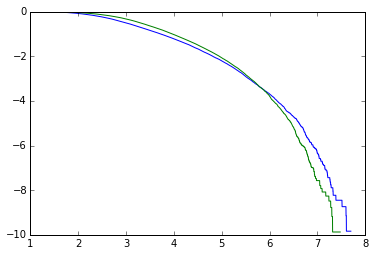

In [397]:
plt.plot(np.log(ccdf1[0]), np.log(ccdf1[1]))
plt.plot(np.log(ccdf2[0]), np.log(ccdf2[1]))

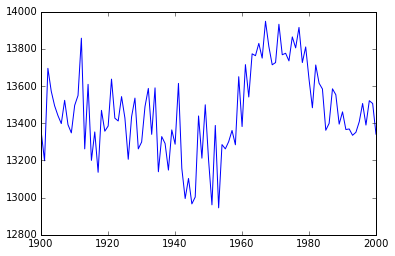

In [2101]:
plt.plot(years, [len(year_words[year]) for year in year_words])

In [2044]:
import statsmodels.api as sm
x = years
x = sm.add_constant(x)
mod = sm.OLS(rw_avg_clust.values(), x)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     91.37
Date:                Mon, 22 Jun 2015   Prob (F-statistic):           1.00e-15
Time:                        01:59:46   Log-Likelihood:                 219.53
No. Observations:                 101   AIC:                            -435.1
Df Residuals:                      99   BIC:                            -429.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9658      0.185     10.622      0.000         1.599     2.333
x1            -0.0009   9.49e-05     -9.559      0.000        -0.001    -0.001
==============================================================================
Omnibus:                        7.598   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.015
Skew:                          -0.272   Prob(JB):                        0.134
Kurtosis:                       2.188   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

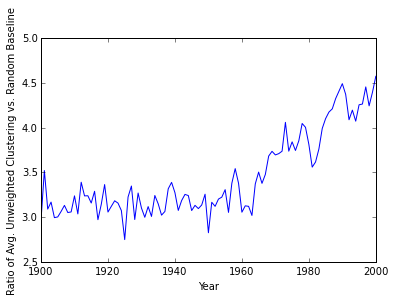

In [320]:
# Degrees from normalized confidences
#conf_bclust = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth9/netstats/commonnonstop-1900-2000-0-7-0.0-binary.pkl")
#avg_conf_bclust_mean, avg_conf_bclust_stderr, rand_clust = seriesanalysis.get_series_mean_conf_clust(conf_bclust, avg_conf_degs[0])
plt.plot(years, (np.array(avg_clust.values())) /np.array(rw_avg_clust.values()) )
plt.xlabel("Year")
plt.ylabel("Ratio of Avg. Unweighted Clustering vs. Random Baseline")

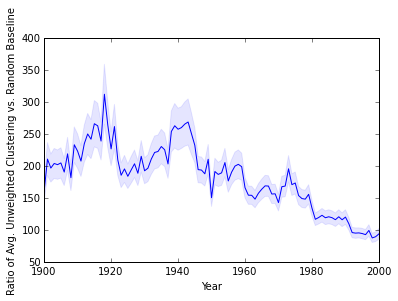

In [1828]:
plothelper.plot_nice_err(years, avg_conf_bclust_top_mean/rand_clust, avg_conf_bclust_stderr/rand_clust)
plt.xlabel("Year")
plt.ylabel("Ratio of Avg. Unweighted Clustering vs. Random Baseline")

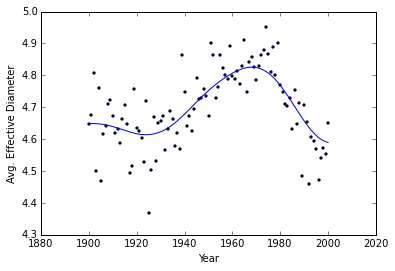

In [1416]:
avg_eff_diam = util.load_pickle(DATA_DIR + "/conf/alpha0.01/netstats/commonnonstop-1900-2000-0-7-eff_diam.pkl")
plothelper.plot_smooth(years, avg_eff_diam.values())
plt.xlabel("Year")
plt.ylabel("Avg. Effective Diameter")

In [285]:
concrete = util.load_word_list("/dfs/scratch0/googlengrams/misc/concretewords-cmn.txt")
abstract = util.load_word_list("/dfs/scratch0/googlengrams/misc/abstractwords-cmn.txt")
nouns = util.load_word_list("/dfs/scratch0/googlengrams/misc/nouns.txt")
adjs = util.load_word_list("/dfs/scratch0/googlengrams/misc/adjs.txt")
verbs = util.load_word_list("/dfs/scratch0/googlengrams/misc/verbs.txt")
advs = util.load_word_list("/dfs/scratch0/googlengrams/misc/advs.txt")
word_types = {"concrete" : concrete, 
              "abstract" : abstract, 
              "nouns" : nouns, 
              "adjs" : adjs,
              "advs" : advs, 
              "verbs" : verbs,
               "top" : top_words,} 
             #  "top-top" : top_top_words}

In [1705]:
def plot_compare(stat_dict, word_types, subset=None, legend_loc='upper right'):
    if subset == None:
        types = word_types.keys()
    else:
        types = subset
    for w_type in types:
        mean_series = seriesanalysis.get_series_mean_conf(stat_dict, word_types[w_type])[0]
        plt.plot(years, mean_series)
    plt.legend(types, loc=legend_loc)
    plt.xlabel("Year")

In [321]:
plot_compare(degs, word_types, subset=["advs", "nouns", "adjs", "verbs", "top"], legend_loc='upper left')

NameError: name 'plot_compare' is not defined

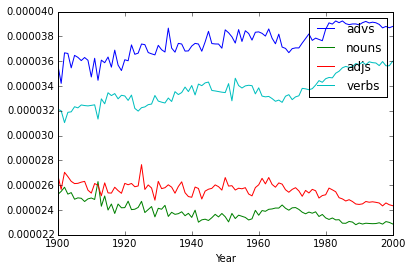

In [1708]:
plot_compare(freqs, word_types, subset=["advs", "nouns", "adjs", "verbs"])

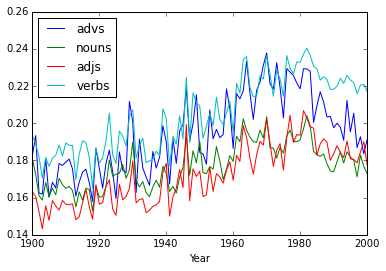

In [2226]:
plot_compare(conf_bclust, word_types, subset=["advs", "nouns", "adjs", "verbs"], legend_loc='upper left')

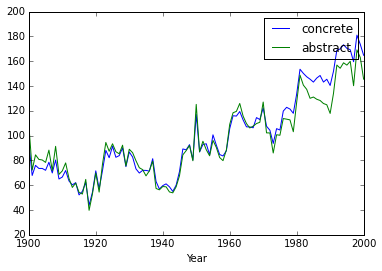

In [1710]:
plot_compare(conf_degs, word_types, subset=["concrete", "abstract"])

In [1489]:
# Load concreteness ratings
fp = open("/dfs/scratch0/googlengrams/misc/concreteness_ratings.csv")
fp.readline()
con_rats = {}
con_stds = {}
for line in fp:
    line = line.split(",")
    con_rats[line[0]] = float(line[2])
    con_stds[line[0]] = float(line[3])
plt.hist(con_rates)

In [2257]:
def make_rate_other(year_series, rate_series, year):
    rates = []
    other = []
    for word in rate_series:
        if word in year_series and con_stds[word] < 1.5:
            rates.append(rate_series[word])
            other.append(year_series[word][year])
    return rates, other

con_rates, w_clusts = make_rate_other(conf_wclust, con_rats, 2000)
sp.stats.spearmanr(sp.stats.mstats.zscore(con_rates), sp.stats.mstats.zscore(w_clusts))

(0.08759133221337001, 6.4358693070799938e-15)

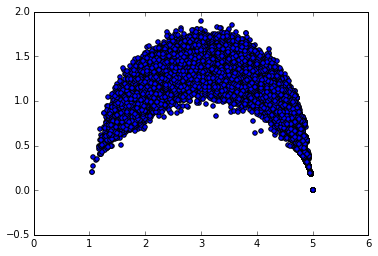

In [1494]:
words = con_stds.keys()
con_rate_array = np.array([con_rats[word] for word in words])
con_std_array = [con_stds[word] for word in words]
plt.scatter(con_rate_array, con_std_array)

In [2259]:
sig_con_scores = [conf_wclust[word][2000] for word in concrete if word in conf_bclust]
sig_abs_scores = [conf_wclust[word][2000] for word in abstract if word in conf_bclust]
print "Median concrete clustering", np.median(sig_con_scores)
print "Median abstract clustering", np.median(sig_abs_scores)
print "Rank sums test:", sp.stats.ranksums(sig_con_scores, sig_abs_scores)

Median concrete clustering 0.0208111345454
Median abstract clustering 0.0144926018226
Rank sums test: (7.0756364240805798, 1.4876442636405784e-12)


In [19]:
# Now for more tests! Loading frequency and volatility infos
freqs = util.load_pickle(DATA_DIR + "/info/commonnonstop-1900-2000-0-8-freqs.pkl")
#vols = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth9/volstats/commonnonstop-1900-2000-0-7-0.0-vols.pkl")
#vols2 = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth7/volstats/commonnonstop-1900-2000-0-7-0.0-vols.pkl")
#jvols = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth9/volstats/commonnonstop-1900-2000-0-7-0.0-jvols.pkl")

In [282]:
vols = util.load_pickle(DATA_DIR + "/nppmi_conf_fwer/lsmooth0/volstats/freqnonstop_peryear-1900-2000-7-0.0-top20000-vols.pkl")

In [2012]:
vols_sub_sub = util.load_pickle(DATA_DIR + "/nppmi_conf0.01/lsmooth7/volstats/commonnonstop-1900-2000-8-6-0.0-vols.pkl")

IOError: [Errno 2] No such file or directory: '/dfs/scratch0/googlengrams/2012-eng-fic//nppmi_conf0.01/lsmooth7/volstats/commonnonstop-1900-2000-8-6-0.0-vols.pkl'

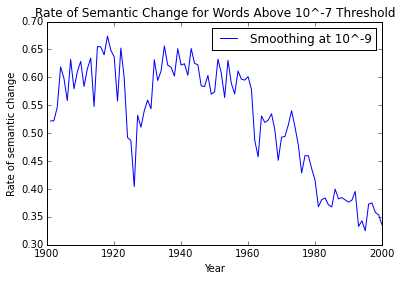

In [283]:
vols_mean, vols_err = seriesanalysis.get_series_mean_stderr(vols, vols.keys(), one_minus=True, start_year=1901)
#vols2_mean, vols2_err = seriesanalysis.get_series_mean_conf(vols2, vols_sub.keys(), one_minus=True)
plt.plot(years[1:], vols_mean)
#plt.plot(years[1:], vols2_mean)
plt.xlabel("Year")
plt.ylabel("Rate of semantic change")
plt.legend(["Smoothing at 10^-9", "Smoothing at 10^-7"])
plt.title("Rate of Semantic Change for Words Above 10^-7 Threshold")

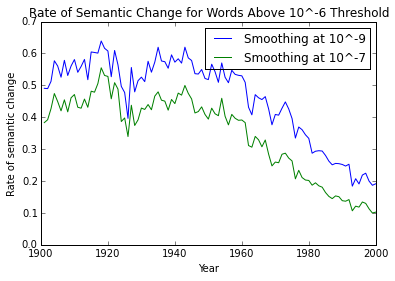

In [1633]:
vols_mean, vols_err = seriesanalysis.get_series_mean_conf(vols_sub_sub, vols_sub_sub.keys(), one_minus=True)
vols2_mean, vols2_err = seriesanalysis.get_series_mean_conf(vols2, vols_sub_sub.keys(), one_minus=True)
plt.plot(years[1:], vols_mean)
plt.plot(years[1:], vols2_mean)
plt.xlabel("Year")
plt.ylabel("Rate of semantic change")
plt.legend(["Smoothing at 10^-9", "Smoothing at 10^-7"])
plt.title("Rate of Semantic Change for Words Above 10^-6 Threshold")

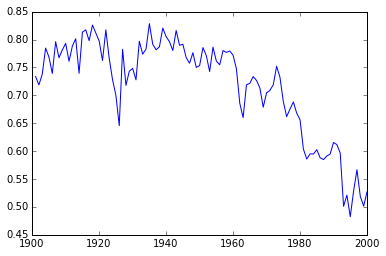

In [1528]:
jvols_mean, jvols_err = seriesanalysis.get_series_mean_conf(jvols, top_words, one_minus=True)
plt.plot(years[1:], jvols_mean)

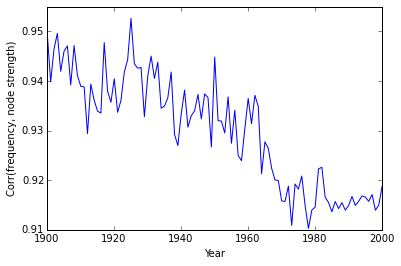

In [2219]:
freq_sum_corr, freq_deg_p = seriesanalysis.series_corr(freqs, conf_sums, top_words)
plt.plot(years, freq_sum_corr)
plt.xlabel("Year")
plt.ylabel("Corr(frequency, node strength)")

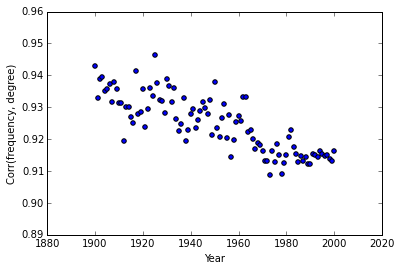

In [2291]:
freq_deg_corr, freq_deg_p = seriesanalysis.series_corr(freqs, conf_degs, common_top_words)
plt.scatter(years, freq_deg_corr)
plt.xlabel("Year")
plt.ylabel("Corr(frequency, degree)")

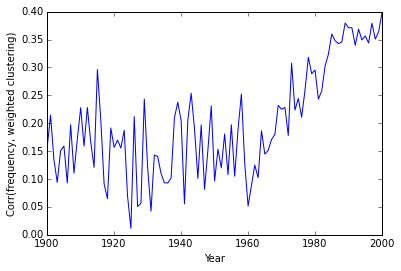

In [2228]:
freq_wclust_corr, freq_deg_p = seriesanalysis.series_corr(freqs, conf_bclust, top_words)
plt.plot(years, freq_wclust_corr)
plt.xlabel("Year")
plt.ylabel("Corr(frequency, weighted clustering)")

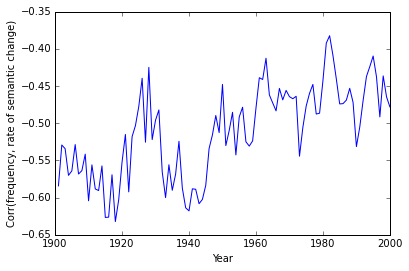

In [1537]:
freq_vol_corr, freq_deg_p = seriesanalysis.series_corr(freqs, vols, common_top_words, start_year=1901)
plt.plot(years[1:], -1*np.array(freq_vol_corr))
plt.xlabel("Year")
plt.ylabel("Corr(frequency, rate of semantic change)")

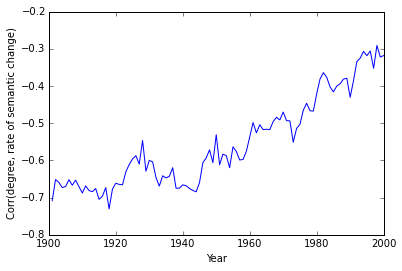

In [1975]:
#deg_vol_corr, freq_deg_p = seriesanalysis.series_corr(conf_degs, vols, top_words, start_year=1901)
plt.plot(years[1:], -1*np.array(deg_vol_corr))
plt.xlabel("Year")
plt.ylabel("Corr(degree, rate of semantic change)")

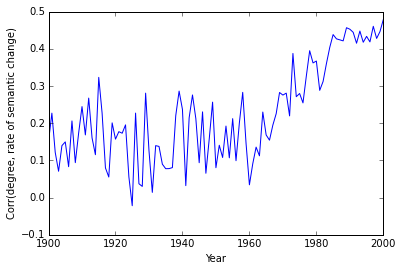

In [2229]:
deg_clust_corr, freq_deg_p = seriesanalysis.series_corr(conf_degs, conf_bclust, top_words)
plt.plot(years, deg_clust_corr)
plt.xlabel("Year")
plt.ylabel("Corr(degree, rate of semantic change)")

Rank sums test {'set1_size': 2089, 'p': 3.7055766394536419e-127, 'set1_med': 0.47395376144196066, 'set2_size': 1662, 'set2_med': 0.56605717084146945, 'z': -23.988054953344331}


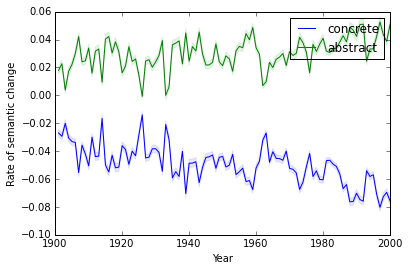

In [286]:
concrete_s = seriesanalysis.get_set_dev(vols, concrete, one_minus=True)
abstract_s = seriesanalysis.get_set_dev(vols, abstract, one_minus=True)
plothelper.plot_nice_err(years[1:], concrete_s[0], concrete_s[1])
plothelper.plot_nice_err(years[1:], abstract_s[0], abstract_s[1], color='green')
plt.legend(["concrete", "abstract"])
plt.xlabel("Year")
plt.ylabel("Rate of semantic change")
print "Rank sums test", seriesanalysis.series_mean_ranksums(concrete, abstract, vols, one_minus=True) 

Rank sums test {'set1_size': 4645, 'p': 3.6536949589319976e-23, 'set1_med': 0.50771102884346653, 'set2_size': 1243, 'set2_med': 0.54580747780033922, 'z': -9.9130365314308619}


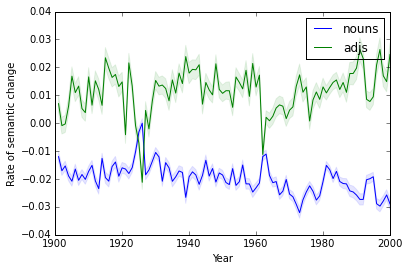

In [292]:
noun_s = seriesanalysis.get_set_dev(vols, nouns, one_minus=True)
adj_s = seriesanalysis.get_set_dev(vols, adjs, one_minus=True)
plothelper.plot_nice_err(years[1:], noun_s[0], noun_s[1])
plothelper.plot_nice_err(years[1:], adj_s[0], adj_s[1], color='green')
plt.legend(["nouns", "adjs"])
plt.xlabel("Year")
plt.ylabel("Rate of semantic change")
print "Rank sums test", seriesanalysis.series_mean_ranksums(nouns, adjs, vols, one_minus=True) 

In [1995]:
sp.stats.pearsonr(noun_s[0], adj_s[0])

(0.86956447930491909, 8.5942404988360578e-32)

In [293]:
freq_means = seriesanalysis.get_word_means(freqs, concrete + abstract + nouns + adjs + verbs + advs)
c_freqs = np.array([freq_means[word] for word in concrete if word in freq_means])
a_freqs = np.array([freq_means[word] for word in abstract if word in freq_means])
n_freqs = np.array([freq_means[word] for word in nouns if word in freq_means])
m_freqs = np.array([freq_means[word] for word in adjs if word in freq_means])
v_freqs = np.array([freq_means[word] for word in verbs if word in freq_means])
q_freqs = np.array([freq_means[word] for word in advs if word in freq_means])
print "Means for different categories"
print "Concrete:", np.mean(c_freqs), np.median(c_freqs), "Abstract:", np.mean(a_freqs), np.median(a_freqs)
print "Nouns:", np.mean(n_freqs), np.median(n_freqs), "Adjectives:", np.mean(m_freqs), np.median(m_freqs)
print "Verbs:", np.mean(v_freqs), np.median(v_freqs), "Adverbs:", np.mean(q_freqs), np.median(q_freqs)

Means for different categories
Concrete: 3.15457378199e-05 5.55408737898e-06 Abstract: 3.78156555554e-05 4.28528252963e-06
Nouns: 2.38498939052e-05 4.58471016341e-06 Adjectives: 2.56800090844e-05 4.04366552923e-06
Verbs: 3.36425213292e-05 4.68858759767e-06 Adverbs: 3.74565383303e-05 3.82501704478e-06


In [296]:
# Among the words in the top of the language, which moved the furthest in semantic space
#disps = util.load_pickle(DATA_DIR + "/nppmi_conf_fwer/lsmooth0/volstats/freqnonstop_peryear-1900-2000-7-0.0-top20000-disps.pkl")
most_changed = sorted(disps.keys(), key= lambda word : disps[word][1960], reverse=False)
high_freq = sorted(freqs, key=lambda key : freqs[key][2000], reverse=True)
most_changed_high_freq = [word for word in most_changed if word in high_freq[0:2000]]
most_changed

[u'saucy',
 u'hang',
 u'fawn',
 u'rabican',
 u'nunnery',
 u'fleeces',
 u'woody',
 u'roots',
 u'woods',
 u'clotted',
 u'spiders',
 u'hanging',
 u'pinipesse',
 u'comically',
 u'houyhnhnm',
 u'sevens',
 u'disobeying',
 u'canes',
 u'glitters',
 u'sprague',
 u'aileen',
 u'scold',
 u'igual',
 u'crotch',
 u'originality',
 u'tingle',
 u'caned',
 u'vano',
 u'hermann',
 u'wickam',
 u'vigasz',
 u'slothful',
 u'aften',
 u'grenadiers',
 u'stipulate',
 u'savingly',
 u'appropriation',
 u'politician',
 u'bringing',
 u'inevitably',
 u'foul',
 u'wooded',
 u'wooden',
 u'four',
 u'harville',
 u'wednesday',
 u'broiled',
 u'steadfastness',
 u'immunities',
 u'guardsmen',
 u'glossin',
 u'targy',
 u'sooty',
 u'peredur',
 u'francesco',
 u'scrapes',
 u'scraper',
 u'feasibility',
 u'miniatures',
 u'snuggest',
 u'sooth',
 u'mortgages',
 u'gorman',
 u'succumb',
 u'crouch',
 u'sustaining',
 u'consenting',
 u'grandcourt',
 u'inanimate',
 u'errors',
 u'scraped',
 u'snuggled',
 u'usened',
 u'semicircular',
 u'cooking',

In [328]:
clust_w_trends = trendestimator.get_trend_estimates({word:series for word, series in conf_degs.items()}, start_year=1900)
processed_wclust = trendestimator.process_trend_estimates(clust_w_trends, freqs, slope_thresh=0)

KeyError: u'rabican'

In [2292]:
freq_trends = trendestimator.get_trend_estimates({word:series for word, series in freqs.items() 
                                                    if word in nouns}, start_year=1900)

In [327]:
clust_w_trends["love"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.577
Date:                Sat, 27 Jun 2015   Prob (F-statistic):              0.214
Time:                        22:56:37   Log-Likelihood:                 200.20
No. Observations:                  59   AIC:                            -396.4
Df Residuals:                      57   BIC:                            -392.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0202      0.002      9.507      0.000         0.016     0.024
x1          -7.94e-05   6.32e-05     -1.256      0.214        -0.000  4.72e-05
==============================================================================
Omnibus:                        6.401   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.521
Skew:                           0.375   Prob(JB):                       0.0233
Kurtosis:                       4.580   Cond. No.                         66.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
len(processed_wclust["broadened"])

130

In [314]:
trendestimator.sort_trend_infos(processed_wclust["narrowed"], "slope", descending=True, freq_rank_thresh=10.0**-5.0, r2_thresh=0.0)

[(u'folks',
  {'fpvalue': 0.00040597083898803634,
   'freq_rank': 1.1614100486356718e-05,
   'intercept': 0.058413762281767159,
   'pvalue': 0.00040597083898803575,
   'r2': 0.36512216396591801,
   'slope': 0.0043638166054447728}),
 (u'killer',
  {'fpvalue': 7.2640629064997856e-07,
   'freq_rank': 1.415566854671798e-05,
   'intercept': -0.0030624445770164096,
   'pvalue': 7.2640629064997687e-07,
   'r2': 0.75275680621042484,
   'slope': 0.0024657302111666577}),
 (u'exchange',
  {'fpvalue': 0.00033025481765643034,
   'freq_rank': 1.0926906645474727e-05,
   'intercept': 0.027460702293576597,
   'pvalue': 0.00033025481765643235,
   'r2': 0.25638343688630005,
   'slope': 0.0023696739813111492}),
 (u'nurse',
  {'fpvalue': 0.00026418018089474534,
   'freq_rank': 2.532125702242271e-05,
   'intercept': 0.063898699718128019,
   'pvalue': 0.00026418018089474394,
   'r2': 0.2687704522159029,
   'slope': 0.0023359514737104525}),
 (u'van',
  {'fpvalue': 2.4800067697660979e-08,
   'freq_rank': 2.037

In [317]:
trendestimator.sort_trend_infos(processed_wclust["broadened"], "slope", descending=False, freq_rank_thresh=10.0**-5.0, r2_thresh=0.1)

[(u'stranger',
  {'fpvalue': 9.5111340646165943e-05,
   'freq_rank': 3.9692001504073218e-05,
   'intercept': 0.15992188973505639,
   'pvalue': 9.5111340646166756e-05,
   'r2': 0.37394759995150817,
   'slope': -0.0040250292721766071}),
 (u'guy',
  {'fpvalue': 8.8076856812844853e-08,
   'freq_rank': 0.00010039849557740796,
   'intercept': 0.12685150487160998,
   'pvalue': 8.8076856812844959e-08,
   'r2': 0.25212315103306271,
   'slope': -0.0013022950453522256}),
 (u'bedside',
  {'fpvalue': 0.00061626567741853398,
   'freq_rank': 1.8520136299495211e-05,
   'intercept': 0.056685819308031085,
   'pvalue': 0.00061626567741853019,
   'r2': 0.28118756443911852,
   'slope': -0.0012146008666680448}),
 (u'hotel',
  {'fpvalue': 3.9310160362595886e-12,
   'freq_rank': 8.2531455714476192e-05,
   'intercept': 0.11625090710189585,
   'pvalue': 3.9310160362596403e-12,
   'r2': 0.3866457610039753,
   'slope': -0.0011923977751337241}),
 (u'publisher',
  {'fpvalue': 1.0023215491985309e-07,
   'freq_rank':

In [1862]:
%timeit np.random.gamma(2, 9.5)

The slowest run took 22.15 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 312 ns per loop


In [1950]:
a = list(np.random.randn(10 ** 7.0))

In [1953]:
%timeit np.random.shuffle(np.array(a))

1 loops, best of 3: 2.57 s per loop


In [1890]:
import random, math
%timeit int(round(1.2))

The slowest run took 10.72 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 267 ns per loop


In [1875]:
%timeit np.random.permutation(a)

KeyboardInterrupt: 

In [1874]:
len(a)

100000000

In [1886]:
int(1.6)

1

In [1889]:
round(12)

12.0

In [1917]:
test1900 = matstore.retrieve_mat_as_coo(DATA_DIR + "/null/1902.bin")

In [1918]:
test1900c = test1900.tocsr()
test1900c = test1900c + test1900c.T

In [1919]:
test1900o = test1900c.tocoo()

(array([ 20537297.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,     

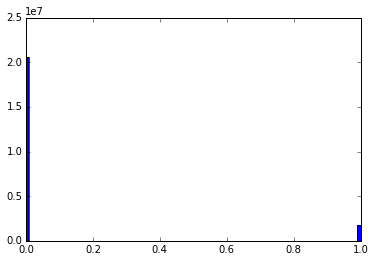

In [1939]:
plt.hist(info[2], bins=100)

In [1926]:
test1900o.nnz

22296046

In [1928]:
float(test1900o.nnz)/float(mat1900_r.nnz)

4.652850605948232

In [1930]:
from cooccurrence.symconf import make_conf_mat

In [1935]:
info = make_conf_mat(test1900c, 10 ** -12.0, 10 ** 8.0)

In [1936]:
info[2].sum()

1758749.0

In [1940]:
from cooccurrence.laplaceppmigen import make_ppmi_mat
from scipy.sparse import coo_matrix
info2 = make_ppmi_mat(test1900c, (coo_matrix((info[2], (info[0], info[1])))).tocsr(), 0)

(151278, 151278)
0.0


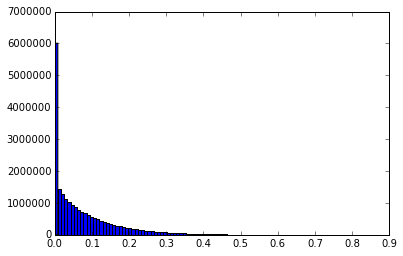

In [1943]:
p = plt.hist(info2[2], bins=100)

In [1948]:
np.median(info2[2])

0.045179215102362599

In [1947]:
np.median(mat1990.data)

0.11497791226083082

In [25]:
types = {}
tokens = {}
for year in range(1900, 2001):
    counts = [freqs[word][year] for word in freqs if freqs[word][year] > 5 * 10 ** -7.0]
    types[year] = len(counts)
    #tokens[year] = (np.array(counts) * samplesizes[year]).sum()

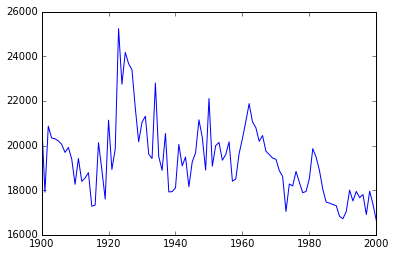

In [26]:
plt.plot(years, np.array(types.values()))

In [ ]:
freqs_s = {}
mins = {}
for year in range(1900, 2001):
    freqs_s[year] = sorted([freqs[word][year] for word in freqs if freqs[word][year] > 0 and word in year_words_large[year]], reverse=True)
    mins[year] = freqs_s[year][30000]

In [ ]:
sums = []
for year in years:
    sums.append(np.sum([freq for freq in freqs_s[year][:50000] if freq > 10**-7.0]))

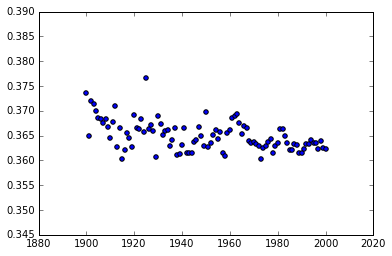

In [2416]:
plt.scatter(years, sums)

In [3]:
from vecanalysis.representations.explicit import Explicit

In [436]:
test = Explicit.load("/dfs/scratch0/googlengrams/2012-eng-fic/nppmi_conf_fwer/lsmooth0/1950.bin")

In [5]:
test2 = Explicit.load("/dfs/scratch0/googlengrams/2012-eng-fic/nppmi_conf/lsmooth10/2000.bin")

In [437]:
test.closest("pants")

[(0.99999999999999989, u'pants'),
 (0.39856782282420644, u'trousers'),
 (0.30524787506466361, u'shorts'),
 (0.30095254925212256, u'trouser'),
 (0.27081998303114851, u'slacks'),
 (0.2271555018269048, u'jacket'),
 (0.22198933137883076, u'breeches'),
 (0.2121080388280322, u'jeans'),
 (0.20095762795735841, u'raincoat'),
 (0.19747179501400824, u'leggings')]

In [8]:
test2.closest("donation", n=10)

[(1.0, u'donation'),
 (0.28937312986003033, u'contribution'),
 (0.25431405157183512, u'percentage'),
 (0.2197495039075168, u'segment'),
 (0.21608410728633681, u'sum'),
 (0.19912048645990621, u'portion'),
 (0.19270577824672724, u'chunk'),
 (0.18162309359752538, u'reward'),
 (0.17720711595601829, u'dowry'),
 (0.16421844393697771, u'fraction')]

In [10]:
test2.closest("rewarded", n=10)

[(1.0000000000000004, u'rewarded'),
 (0.19257236558683158, u'compensated'),
 (0.14903474900012773, u'paragon'),
 (0.14114322593012393, u'prude'),
 (0.12851162306098271, u'intentioned'),
 (0.12623823994304098, u'reward'),
 (0.11256526854402465, u'fared'),
 (0.10985685867676181, u'upholstered'),
 (0.1035900568724854, u'repay'),
 (0.099098538254663956, u'perseverance')]

[u'said',
 u'would',
 u'one',
 u'know',
 u'could',
 u'time',
 u'back',
 u'like',
 u'see',
 u'think',
 u'man',
 u'way',
 u'going',
 u'go',
 u'get',
 u'want',
 u'come',
 u'say',
 u'good',
 u'never',
 u'much',
 u'long',
 u'right',
 u'thought',
 u'tell',
 u'first',
 u'little',
 u'got',
 u'hand',
 u'eyes',
 u'well',
 u'head',
 u'went',
 u'two',
 u'take',
 u'make',
 u'day',
 u'look',
 u'told',
 u'came',
 u'door',
 u'old',
 u'even',
 u'away',
 u'room',
 u'face',
 u'made',
 u'something',
 u'us',
 u'must',
 u'nothing',
 u'side',
 u'last',
 u'moment',
 u'thing',
 u'looked',
 u'knew',
 u'sure',
 u'end',
 u'course',
 u'might',
 u'house',
 u'still',
 u'life',
 u'years',
 u'let',
 u'great',
 u'new',
 u'night',
 u'place',
 u'put',
 u'left',
 u'front',
 u'father',
 u'ever',
 u'hands',
 u'give',
 u'mind',
 u'part',
 u'though',
 u'world',
 u'better',
 u'seen',
 u'done',
 u'love',
 u'anything',
 u'woman',
 u'mother',
 u'find',
 u'far',
 u'saw',
 u'heard',
 u'wanted',
 u'around',
 u'always',
 u'looking',


In [19]:
rand = np.random.randn(10**8.0)

In [22]:
len(rand)

100000000

In [24]:
%timeit np.random.multinomial(6 * 10 ** 6.0, rand / (rand.sum() + 100000000.0))

KeyboardInterrupt: 